## KNTU_IPM machine learning

# excercise logistic regression

## 1. projectile_range
# Objective:
Use logistic regression to classify whether a projectile’s horizontal range exceeds a threshold (e.g., 100 meters) based on its initial velocity (m/s) and launch angle (degrees).

# Dataset:
The "projectile_range_data.csv" contains:

Features: Initial_Velocity_m_per_s, Launch_Angle_deg


Target: Range_m (continuous, will be converted to binary)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading and Visualizing the Data
We’ll load the dataset using pandas, create a binary target variable, and visualize the data to understand the distribution of classes.



Loading: Read "projectile_range_data.csv" into a DataFrame.


Preprocessing: Create a binary target by thresholding Range_m at 100 meters (arbitrary but reasonable based on data range).


Visualization: Scatter plot the data points (Initial_Velocity_m_per_s vs. Launch_Angle_deg), coloring points by class (0 or 1).

In [18]:
# Step 1: Load and preprocess the dataset
data = pd.read_csv("projectile_range_data.csv")

# Create binary target: 1 if Range_m >= 100, else 0
data['y'] = (data['Range_m'] >= 100).astype(int)

# Feature engineering: Add v^2 * sin(2*theta)
data['v2_sin2theta'] = (data['Initial_Velocity_m_per_s'] ** 2) * np.sin(2 * np.radians(data['Launch_Angle_deg']))

# Features and target
X = data[['Initial_Velocity_m_per_s', 'Launch_Angle_deg', 'v2_sin2theta']].values
y = data['y'].values

# Normalize features for gradient descent
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 1e-8  # Avoid division by zero
X_norm = (X - X_mean) / X_std

# Add bias term (intercept)
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])



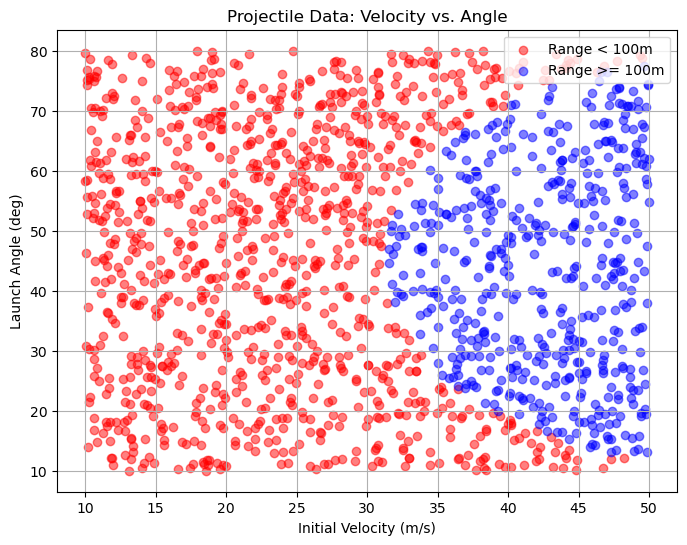

In [19]:
# Visualize the data (in original feature space: velocity vs. angle)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Range < 100m', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Range >= 100m', alpha=0.5)
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Launch Angle (deg)')
plt.title('Projectile Data: Velocity vs. Angle')
plt.legend()
plt.grid(True)
plt.savefig('projectile_data_scatter.png')
plt.show()
plt.close()


The scatter plot shows the distribution of classes. Red points (Range < 100m) and blue points (Range ≥ 100m) help visualize separability.

In [20]:

# Step 2: Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))



In [21]:
# Step 3: Cost function
def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    epsilon = 1e-5
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost



 Indicates the direction and magnitude to adjust weights to reduce the cost.

    Implementation: Compute the gradient for each weight, including the bias term.


Define compute_gradient(X, y, w) to calculate the gradient vector.

In [22]:
# Step 4: Gradient computation
def compute_gradient(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient



In [23]:
# Step 5: Gradient descent
def gradient_descent(X, y, w_init, alpha, num_iters):
    w = w_init.copy()
    cost_history = []
    
    for i in range(num_iters):
        gradient = compute_gradient(X, y, w)
        w -= alpha * gradient
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
        
        # Print progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return w, cost_history



In [24]:
# Initialize parameters
w_init = np.zeros(X_norm.shape[1])  # [w0, w1, w2, w3]
alpha = 0.01  # Reduced for stability
num_iters = 10000



In [25]:
# Run gradient descent
w_opt, cost_history = gradient_descent(X_norm, y, w_init, alpha, num_iters)

# Print final weights and cost
print(f"Final weights: {w_opt}")
print(f"Final cost: {cost_history[-1]:.4f}")



Iteration 0: Cost = 0.6900
Iteration 1000: Cost = 0.2053
Iteration 2000: Cost = 0.1600
Iteration 3000: Cost = 0.1395
Iteration 4000: Cost = 0.1269
Iteration 5000: Cost = 0.1180
Iteration 6000: Cost = 0.1112
Iteration 7000: Cost = 0.1058
Iteration 8000: Cost = 0.1013
Iteration 9000: Cost = 0.0974
Final weights: [-2.08385603  1.25042321 -0.08336477  3.91412222]
Final cost: 0.0941


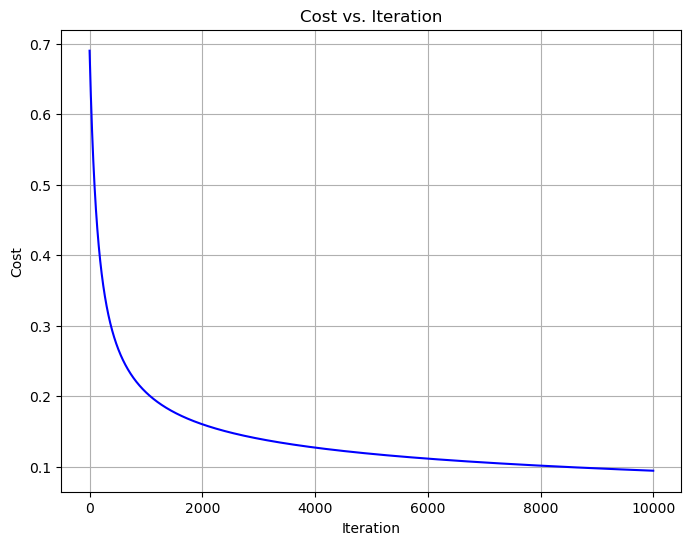

In [26]:
# Step 6: Plot cost history
plt.figure(figsize=(8, 6))
plt.plot(range(num_iters), cost_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.grid(True)
plt.savefig('cost_history.png')
plt.show()
plt.close()



C:\Users\Armin\AppData\Local\Temp\ipykernel_18688\2162258840.py:24: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z, levels=[0.5], colors='green', linestyles=['-'], label='Decision Boundary')


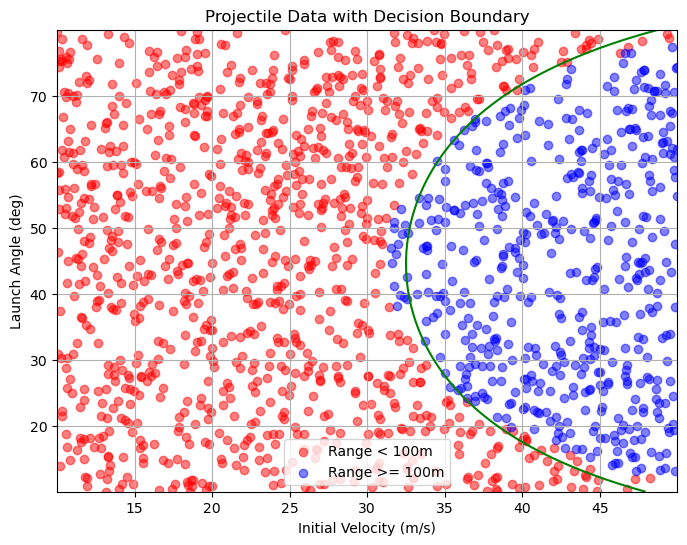

In [27]:
# Step 7: Plot decision boundary using contour plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Range < 100m', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Range >= 100m', alpha=0.5)

# Create a grid for contour plot (only in velocity and angle space for visualization)
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute v2_sin2theta for the grid
v2_sin2theta_grid = (X1 ** 2) * np.sin(2 * np.radians(X2))

# Normalize grid points
grid = np.stack([X1.ravel(), X2.ravel(), v2_sin2theta_grid.ravel()], axis=1)
grid_norm = (grid - X_mean) / X_std
grid_norm = np.hstack([np.ones((grid_norm.shape[0], 1)), grid_norm])

# Compute decision function: w0 + w1*x1 + w2*x2 + w3*(v^2*sin(2theta))
Z = sigmoid(np.dot(grid_norm, w_opt))
Z = Z.reshape(X1.shape)

# Plot decision boundary (where Z = 0.5)
plt.contour(X1, X2, Z, levels=[0.5], colors='green', linestyles=['-'], label='Decision Boundary')
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Launch Angle (deg)')
plt.title('Projectile Data with Decision Boundary')
plt.legend()
plt.grid(True)
plt.savefig('decision_boundary.png')
plt.show()
plt.close()



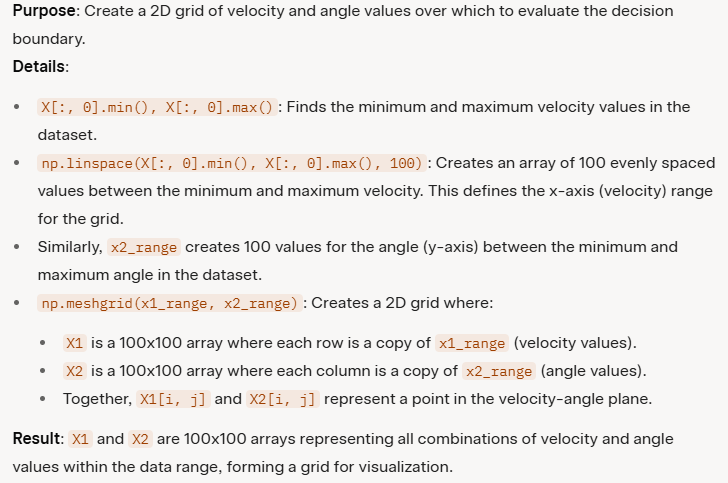

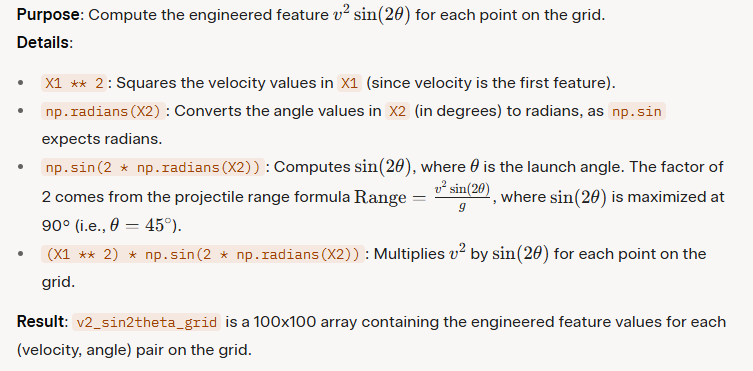

In [28]:
# Evaluate model accuracy
h = sigmoid(np.dot(X_norm, w_opt))
predictions = (h >= 0.5).astype(int)
accuracy = np.mean(predictions == y)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9747


## now lets take a look at sklearn solution

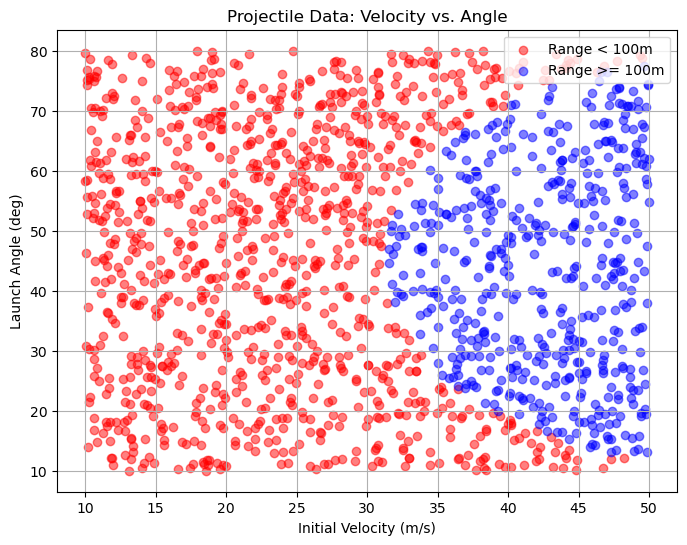

Model Accuracy: 0.9913
Coefficients: [[ 0.63682135 -0.08843004  8.25205532]]
Intercept: [-3.17415409]


C:\Users\Armin\AppData\Local\Temp\ipykernel_18688\1306253627.py:75: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z, levels=[0.5], colors='green', linestyles=['-'], label='Decision Boundary')


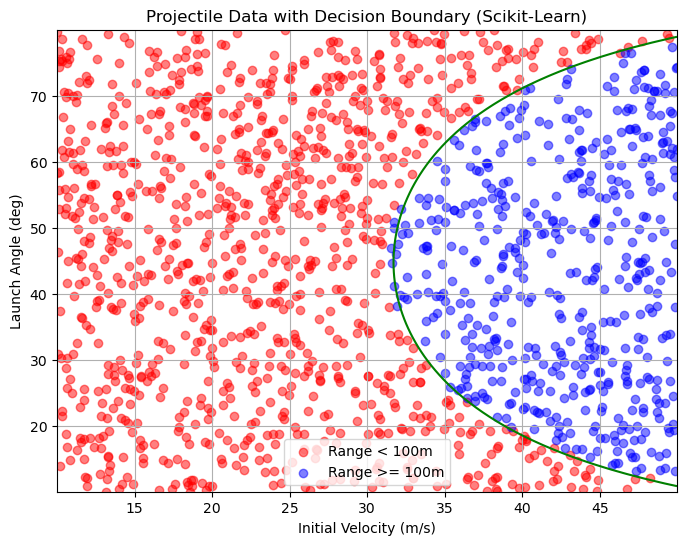

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv("projectile_range_data.csv")

# Create binary target: 1 if Range_m >= 100, else 0
data['y'] = (data['Range_m'] >= 100).astype(int)

# Feature engineering: Add v^2 * sin(2*theta)
data['v2_sin2theta'] = (data['Initial_Velocity_m_per_s'] ** 2) * np.sin(2 * np.radians(data['Launch_Angle_deg']))

# Features and target
X = data[['Initial_Velocity_m_per_s', 'Launch_Angle_deg', 'v2_sin2theta']].values
y = data['y'].values

# Normalize features using StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Visualize the data (in original feature space: velocity vs. angle)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Range < 100m', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Range >= 100m', alpha=0.5)
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Launch Angle (deg)')
plt.title('Projectile Data: Velocity vs. Angle')
plt.legend()
plt.grid(True)

plt.show()
plt.close()

# Step 2: Train logistic regression model using scikit-learn
model = LogisticRegression(solver='lbfgs', max_iter=10000, C=1.0)  # C=1.0 for moderate regularization
model.fit(X_norm, y)

# Step 3: Evaluate the model
y_pred = model.predict(X_norm)
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the learned coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Step 4: Plot decision boundary using contour plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Range < 100m', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Range >= 100m', alpha=0.5)

# Create a grid for contour plot (only in velocity and angle space for visualization)
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute v2_sin2theta for the grid
v2_sin2theta_grid = (X1 ** 2) * np.sin(2 * np.radians(X2))

# Combine grid points into feature matrix
grid = np.stack([X1.ravel(), X2.ravel(), v2_sin2theta_grid.ravel()], axis=1)

# Normalize grid points
grid_norm = scaler.transform(grid)

# Predict probabilities on the grid
Z = model.predict_proba(grid_norm)[:, 1]  # Probability of class 1
Z = Z.reshape(X1.shape)

# Plot decision boundary (where probability = 0.5)
plt.contour(X1, X2, Z, levels=[0.5], colors='green', linestyles=['-'], label='Decision Boundary')
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Launch Angle (deg)')
plt.title('Projectile Data with Decision Boundary (Scikit-Learn)')
plt.legend()
plt.grid(True)

plt.show()
plt.close()